# K-Means Clustering

Suppose you have a dataset and you want to segment the dataset based on various similar features that datapoints have. One of the algorithms that we can use to do this is K- Means Clustering.

K-Means Clustering divides your dataset into n clusters(you'll have to input the n you want) such that objects within a cluster are very similar and objects in different clusters are very different from each other. It makes these clusters based on the distance between various points in the dataset.

We initialize n centroids in the datset randomly and then classify points into clusters based on which cluster centroid it is nearest to. After that the cluster centroids are shifted to the mean of the datapoints in a particular cluster and then this process of allocating clusters based on distance and updating the centroids is repeated until the centroids don't move anymore.

## Importing Libraries

In [18]:
import random 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
%matplotlib inline

## Reading the dataset

In [19]:
cust_df = pd.read_csv("Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


## Preprocessing

Dropping Address because it's a categorical variable which doesn't make sense if we're going to use the Eucidean distance function

In [20]:
df = cust_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [68]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.52379654,
        -0.57652509, -0.5485468 ],
       [ 1.48949049, -0.76634938,  2.5737211 , ..., -0.52379654,
         0.39138677,  1.8799156 ],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  1.90913822,
         1.59755385, -0.5485468 ],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  1.90913822,
         3.45892281, -0.5485468 ],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.52379654,
        -1.08281745, -0.5485468 ],
       [ 2.1116364 , -0.76634938,  1.09746566, ..., -0.52379654,
        -0.2340332 ,  1.8799156 ]])

# Modelling our Dataset

In [69]:
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means.fit(X)
labels = k_means.labels_

We assign labels to each row of our dataset:

In [70]:
df["Clus_lab"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_lab
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,0
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2


We cam get the centroid values by averaging out the features of each cluster:

In [73]:
df.groupby('Clus_lab').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_lab,,,,,,,,,
0,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590
1,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761
2,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222


The K Means Clustering algorithm has now clustered the data for us

Based on age and income, the distribution of the customers would look something like this:

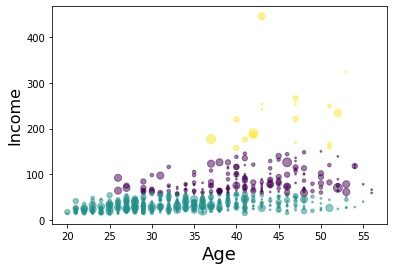

In [74]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

Based on age, income and education, the distribution would look like :

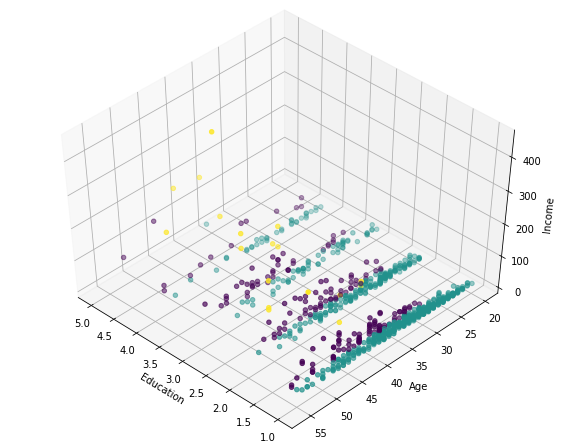

In [75]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))

k-means will partition your customers into mutually exclusive groups, for example, into 3 clusters. The customers in each cluster are similar to each other demographically.
Now we can create a profile for each group, considering the common characteristics of each cluster. 
For example, the 3 clusters can be:

- AFFLUENT, EDUCATED AND OLD AGED(Yellow)
- MIDDLE AGED AND MIDDLE INCOME(Purple)
- YOUNG AND LOW INCOME(Blue)